# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Read in the data set
ames_df = pd.read_csv('ames.csv')
ames_df.head()

# Display the dataset information
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


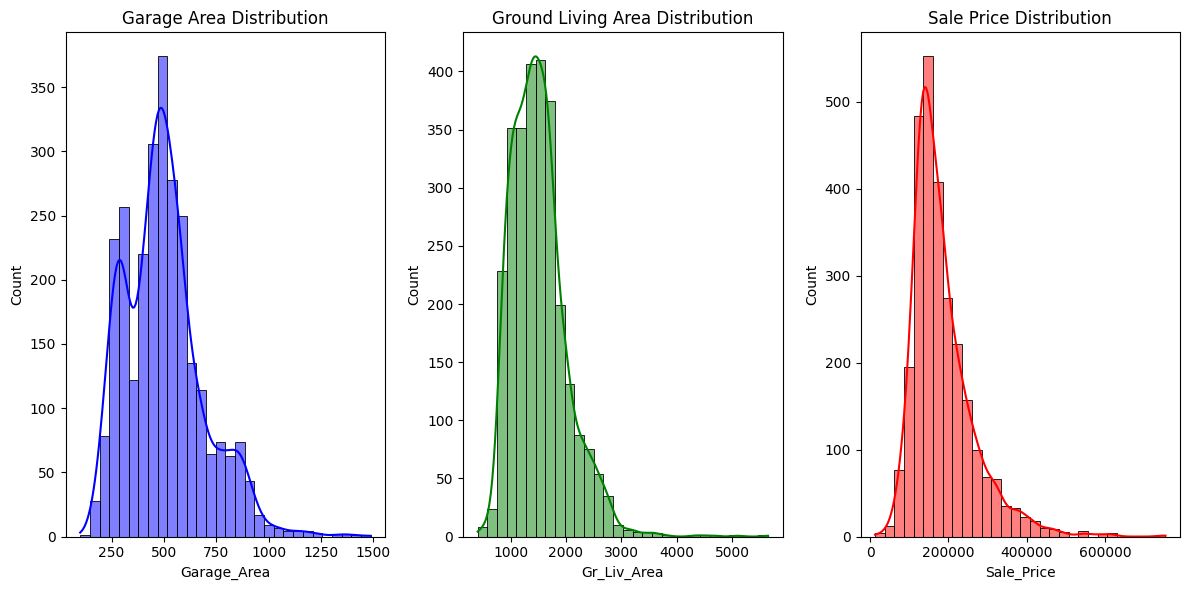

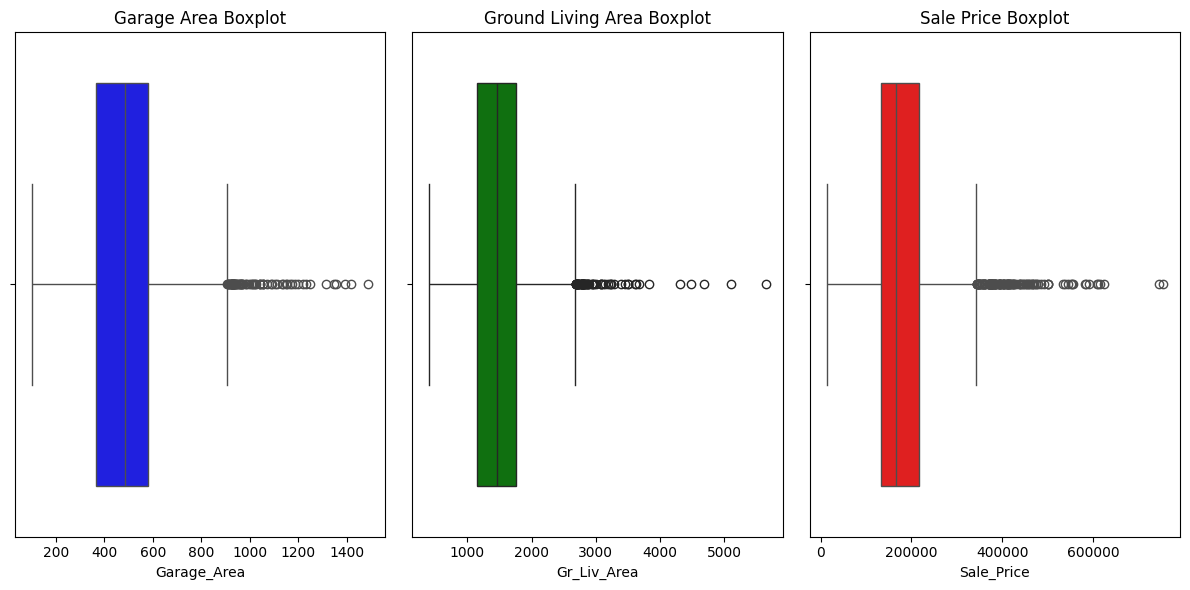

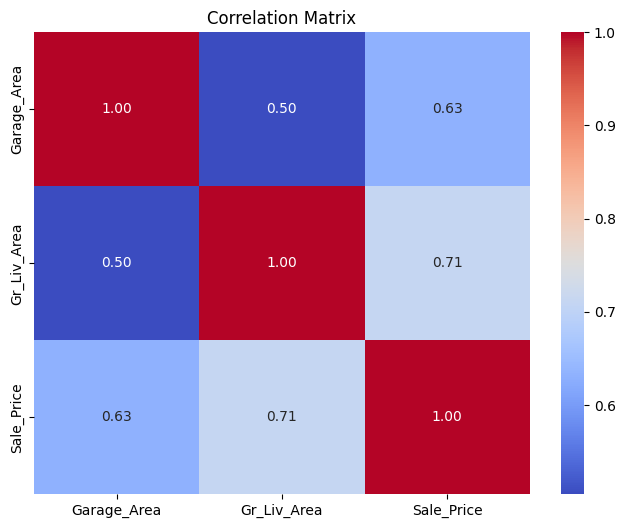

In [3]:
#---------------------------------------------
# DATA CLEANING AND PREPROCESSING
#---------------------------------------------

#----------------------------------------------------------------------
# Check for duplicates, missing values and remove rows with zero values
#----------------------------------------------------------------------


# Remove duplicate rows
ames_df = ames_df.drop_duplicates()

# Check for missing values
ames_df.isnull().sum()

# Remove rows where Garage_Area or Gr_Liv_Area is zero
ames_df = ames_df[(ames_df['Garage_Area'] != 0) & (ames_df['Gr_Liv_Area'] != 0)]

#----------------------------------------------------------------------------------
# Histogram plots to visualize the distribution of the features and target variable
#----------------------------------------------------------------------------------

plt.figure(figsize=(12, 6))

# Histogram plot for Garage_Area
plt.subplot(1, 3, 1)
sns.histplot(ames_df['Garage_Area'], color='blue', bins=30, kde=True)
plt.title('Garage Area Distribution')

# Histogram plot for Gr_Liv_Area
plt.subplot(1, 3, 2)
sns.histplot(ames_df['Gr_Liv_Area'], color='green', bins=30, kde=True)
plt.title('Ground Living Area Distribution')

# Histogram plot for SalePrice
plt.subplot(1, 3, 3)
sns.histplot(ames_df['Sale_Price'], color='red', bins=30, kde=True)
plt.title('Sale Price Distribution')

plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------
# Check for outliers using  boxplots and remove extreme outliers if necessary
#----------------------------------------------------------------------------

plt.figure(figsize=(12, 6))

# Boxplot for Garage_Area
plt.subplot(1, 3, 1)
sns.boxplot(x=ames_df['Garage_Area'], color='blue')
plt.title('Garage Area Boxplot')

# Boxplot for Gr_Liv_Area
plt.subplot(1, 3, 2)
sns.boxplot(x=ames_df['Gr_Liv_Area'], color='green')
plt.title('Ground Living Area Boxplot')

# Boxplot for SalePrice
plt.subplot(1, 3, 3)
sns.boxplot(x=ames_df['Sale_Price'], color='red')
plt.title('Sale Price Boxplot')

plt.tight_layout()
plt.show()

# Correlation heatmap to visualize the relationships between features and target variable
plt.figure(figsize=(8, 6))
correlation_matrix = ames_df[['Garage_Area', 'Gr_Liv_Area', 'Sale_Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




**Interpretation of the histograms**

The histogram for Garage_Area is right-skewed, showing that most houses have smaller garages, while fewer have larger garages. The histogram for Gr_Liv_Area is also right-skewed, indicating that the majority of houses have smaller living areas, while fewer have bigger living areas. The histogram for Sale_Price shows a right-skewed distribution, indicating that the majority of houses are priced cheaper, with fewer houses priced higher.


**Interpretation of the heatmap**

The heatmap reveals a moderate positive correlation (0.63) between Garage_Area and Sale_Price, implying that houses with larger garages have higher sale values. Gr_Liv_Area and Sale_Price have a strong correlation (0.71), indicating that larger living areas are connected with higher sale prices. Garage_Area and Gr_Liv_Area show a positive correlation (0.50), indicating that houses with larger garages also have larger living areas. In summary, the heatmap supports the use of Garage_Area and Gr_Liv_Area as features for predicting Sale_Price, as they have a strong correlation with the target variable.

 **Interpretation oF the boxplots**

The boxplots reveal that there are some outliers in the Garage_Area and Gr_Liv_Area features and also the Sale_Price. However, the features have no extreme outliers, which would have a major impact on model performance. We will not eliminate these outliers because they are not extreme and could contain useful information. On the other side, the target variable, Sale_Price, is substantially right skewed and not normally distributed. This can lead to poor model performance, therefore we'll use a log transformation to make Sale_Price more evenly distributed. This adjustment will help to stabilize the variance and make the data better suited to linear regression analysis.



0    12.278393
1    11.561716
2    12.055250
3    12.404924
4    12.154253
Name: Sale_Price, dtype: float64


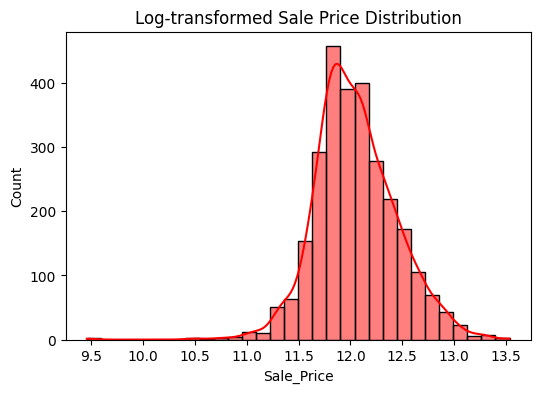

In [4]:
# Log transformation of Sale_Price to make it more normally distributed
ames_df['Sale_Price'] = np.log(ames_df['Sale_Price'])
print(ames_df['Sale_Price'].head())

# Histogram plot for Sale_Price after log transformation
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['Sale_Price'], color='red', bins=30, kde=True)
plt.title('Log-transformed Sale Price Distribution')
plt.show()


In [5]:
# Create a new column for log-transformed Sale_Price
ames_df['Log_Sale_Price'] = ames_df['Sale_Price']

# Split the independent variables(features/X) and dependent variable(target/y)
X = ames_df[['Garage_Area', 'Gr_Liv_Area']]
y = ames_df['Log_Sale_Price']


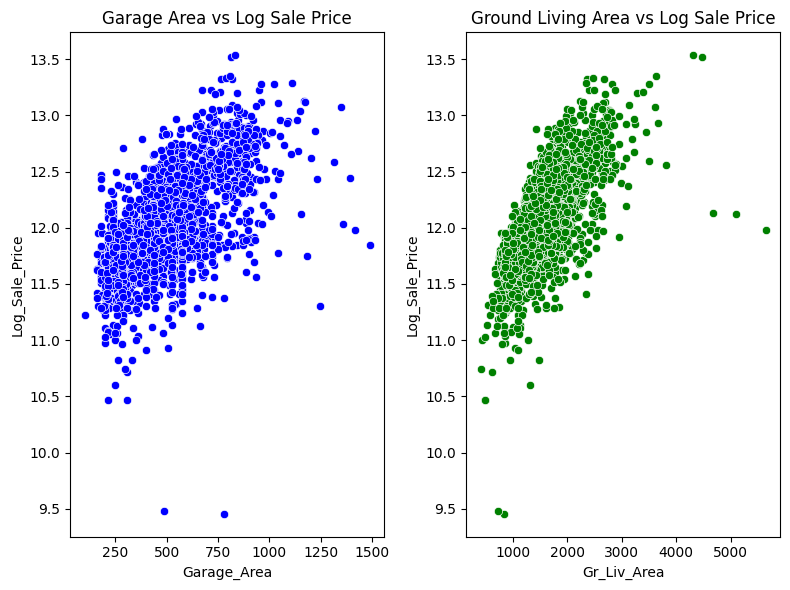

In [6]:
# Scatterplot to visualize the relationship between the independent and dependent variables
plt.figure(figsize=(8, 6))

# Scatterplot for Garage_Area vs Log_Sale_Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=ames_df['Garage_Area'], y=ames_df['Log_Sale_Price'], color='blue')
plt.title('Garage Area vs Log Sale Price')

# Scatterplot for Gr_Liv_Area vs Log_Sale_Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=ames_df['Gr_Liv_Area'], y=ames_df['Log_Sale_Price'], color='green')
plt.title('Ground Living Area vs Log Sale Price')
plt.tight_layout()
plt.show()

In [7]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Print the model intercept and coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)

Model Intercept: 11.070155627568388
Model Coefficients: [0.00073467 0.00040587]


In [10]:
# Generate predictions for the test set
y_pred_log = model.predict(X_test)
print("Predicted Log Sale Prices:", y_pred_log[:5])

# Convert the log-transformed predictions and actual values back to the original scale
y_pred_actual = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

print("Predicted Sale Prices (actual scale):", np.round(y_pred_actual[:5]))
print("Actual Sale Prices (actual scale):", np.round(y_test_actual[:5]))

Predicted Log Sale Prices: [12.36601324 11.97218809 11.72348666 11.99877105 11.82813864]
Predicted Sale Prices (actual scale): [234688. 158291. 123437. 162555. 137055.]
Actual Sale Prices (actual scale): 1456    230500.0
888     159500.0
2290     75190.0
2764    190000.0
981     131250.0
Name: Log_Sale_Price, dtype: float64


In [11]:
# Evaluate the model using the original Sale_Price scale
print('Model Evaluation Metrics:')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, y_pred_actual)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R-squared (R2) Score:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)



Model Evaluation Metrics:
Mean Squared Error (MSE): 2330487511.8358293
R-squared (R2) Score: 0.5951405764584512
Root Mean Squared Error (RMSE): 48275.12311569831


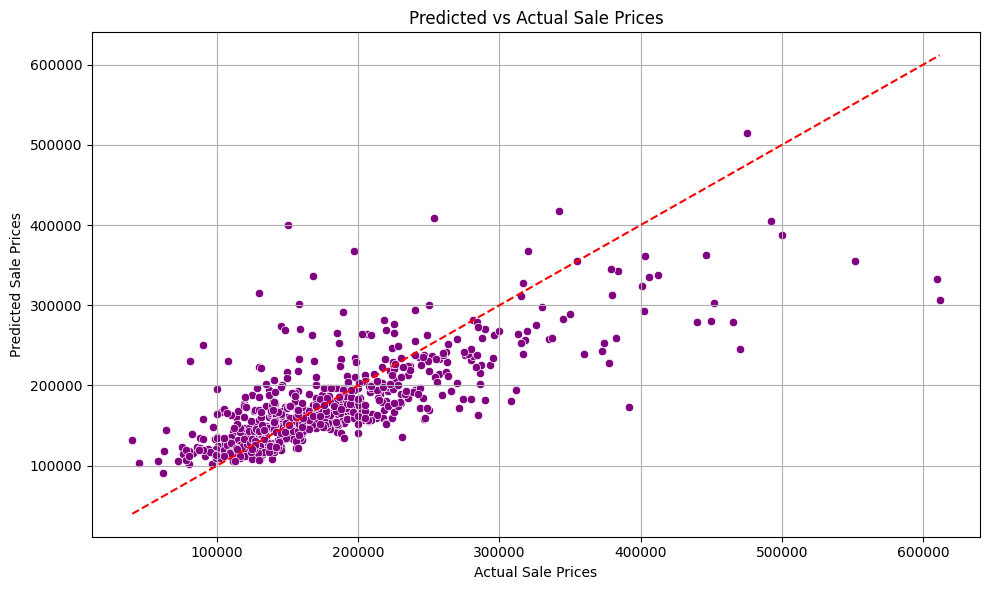

In [12]:
# Generate a scatterplot of the predicted vs actual Sale Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, color='purple')

# Add a diagonal line for reference
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='--')

plt.title('Predicted vs Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Print the coefficients of the model
print("Model Coefficients:")

features = X.columns
for i, feature in enumerate(features):
    print(f"{feature}: {model.coef_[i]:.4f}")

Model Coefficients:
Garage_Area: 0.0007
Gr_Liv_Area: 0.0004


**Interpret coefficients in the context of the prediction:**

The coefficients represent the change in the log-transformed Sale Price due to a one-unit increase in the corresponding feature.The coefficient for 'Garage_Area' suggests that for every additional square foot of garage area, the log-transformed Sale Price rises by about 0.0007. The coefficient for 'Gr_Liv_Area' indicates that for every additional square foot of ground living area, the log-transformed Sale Price increases by about 0.0004.



**Summary of findings**

 To predict the log-transformed Sale Price, the model uses the independent variables 'Gr_Liv_Area' and 'Garage_Area'. The scatterplots of 'Garage_Area' and 'Gr_Liv_Area' versus the log-transformed Sale Price demonstrate that both features have a positive relationship with the target variable. This indicates that larger garage and ground floor living spaces have been associated with higher sale prices.


 scatterplot of predicted vs actual Sale Prices shows that the model's predictions are generally close to the actual values. The predicted sale prices show a general positive correlation with the actual sale prices, indicating that the model was able to capture the relationship between the features and the target variable. Most points fall below the diagonal line, indicating that the model underestimates  prices for several observations.
 

 There are a few noticeable outliers, which could imply that the model overestimated or underestimated the sale prices for particular observations. While the model's predictions are not flawless, the overall pattern of the points supports the hypothesis that larger garage areas and ground living areas lead to higher sale prices.This indicates that the model is effective in capturing the relationship between the features and the target variables.

 The R2 score of 0.60 indicates that approximately 60% of the variance in the log-transformed Sale Price can be explained by the model using 'Gr_Liv_Area' and 'Garage_Area'. This shows that the model has moderate predictive power.The Root Mean Squared Error (RMSE) of about $48 275.12 represents the average difference between predicted and actual Sale Prices on the original scale.A lower RMSE number indicates better model performance, and in this situation, the RMSE implies that the model's predictions are pretty close to the actual Sale Prices. However, the model could be enhanced by adding more features or employing advanced modeling approaches.


